In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from wordcloud import WordCloud, STOPWORDS

plt.style.use('default')
plt.style.use('dark_background')

In [36]:
comments = pd.read_csv('ig_comments.csv')

comments

,input.shortcode,input.page_cursor,data.shortcode_media.edge_media_to_parent_comment.edges.node.id,data.shortcode_media.edge_media_to_parent_comment.edges.node.text,data.shortcode_media.edge_media_to_parent_comment.edges.node.created_at,data.shortcode_media.edge_media_to_parent_comment.edges.node.did_report_as_spam,data.shortcode_media.edge_media_to_parent_comment.edges.node.owner.id,data.shortcode_media.edge_media_to_parent_comment.edges.node.owner.is_verified,data.shortcode_media.edge_media_to_parent_comment.edges.node.owner.profile_pic_url,data.shortcode_media.edge_media_to_parent_comment.edges.node.owner.username,...,data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.edges[0].node.owner.id,data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.edges[0].node.owner.is_verified,data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.edges[0].node.owner.profile_pic_url,data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.edges[0].node.owner.username,data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.edges[0].node.viewer_has_liked,data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.edges[0].node.edge_liked_by.count,data.shortcode_media.edge_media_to_parent_comment.count,data.shortcode_media.edge_media_to_parent_comment.page_info.has_next_page,data.shortcode_media.edge_media_to_parent_comment.page_info.end_cursor,status
0,B3w_PilgaOZ,NaN,17900944285383476,kunuz,1571764475,False,22381255843,False,https://scontent-lga3-1.cdninstagram.com/vp/df...,kingreyna210hoyu899,...,NaN,NaN,NaN,NaN,NaN,NaN,12574,True,QVFCeFl1SHJ0b3p3dUVEVUVXVkRLcnI4WE94THozZS1lZH...,ok
1,B3w_PilgaOZ,NaN,17851022203630482,😂❤️❤️❤️,1571765202,False,998719588,False,https://scontent-lga3-1.cdninstagram.com/vp/49...,artfullyjonesy,...,NaN,NaN,NaN,NaN,NaN,NaN,12574,True,QVFCeFl1SHJ0b3p3dUVEVUVXVkRLcnI4WE94THozZS1lZH...,ok
2,B3w_PilgaOZ,NaN,17845053967734077,follow me and become my friend🐻❤️😇🙌,1571765500,False,21919914505,False,https://scontent-lga3-1.cdninstagram.com/vp/63...,rina_shar_pei,...,NaN,NaN,NaN,NaN,NaN,NaN,12574,True,QVFCeFl1SHJ0b3p3dUVEVUVXVkRLcnI4WE94THozZS1lZH...,ok
3,B3w_PilgaOZ,NaN,17879614537446739,I've just seen a ghost 🌸🎃👾,1571765582,False,1554424319,False,https://scontent-lga3-1.cdninstagram.com/vp/70...,shirleygillies39,...,NaN,NaN,NaN,NaN,NaN,NaN,12574,True,QVFCeFl1SHJ0b3p3dUVEVUVXVkRLcnI4WE94THozZS1lZH...,ok
4,B3w_PilgaOZ,NaN,17915931841357144,😂😂😂😂😂😂😂😂😂😂,1571765596,False,9791371456,False,https://scontent-lga3-1.cdninstagram.com/vp/d2...,taner.860,...,NaN,NaN,NaN,NaN,NaN,NaN,12574,True,QVFCeFl1SHJ0b3p3dUVEVUVXVkRLcnI4WE94THozZS1lZH...,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10931,B3w_PilgaOZ,QVFEWldPYWZzWTM1ajdnZmFKNlhuVFQtVGN3ZXlrQXBPZm...,17876373661458953,❤️❤️❤️❤️❤️❤️,1571414361,False,6817181117,False,https://scontent-lga3-1.cdninstagram.com/vp/66...,pinku.das45,...,NaN,NaN,NaN,NaN,NaN,NaN,12575,False,NaN,ok
10932,B3w_PilgaOZ,QVFEWldPYWZzWTM1ajdnZmFKNlhuVFQtVGN3ZXlrQXBPZm...,17932460422319039,🤣,1571414361,False,5542913467,False,https://scontent-lga3-1.cdninstagram.com/vp/fc...,asya_miller1,...,NaN,NaN,NaN,NaN,NaN,NaN,12575,False,NaN,ok
10933,B3w_PilgaOZ,QVFEWldPYWZzWTM1ajdnZmFKNlhuVFQtVGN3ZXlrQXBPZm...,18000220075267081,🔥🔥🔥,1571414361,False,3883059669,False,https://scontent-lga3-1.cdninstagram.com/vp/e3...,i.5_1,...,NaN,NaN,NaN,NaN,NaN,NaN,12575,False,NaN,ok
10934,B3w_PilgaOZ,QVFEWldPYWZzWTM1ajdnZmFKNlhuVFQtVGN3ZXlrQXBPZm...,18088632376118428,❤️❤️❤️,1571414361,False,13596092341,False,https://scontent-lga3-1.cdninstagram.com/vp/a0...,hv.vw,...,3.558006e+09,False,https://scontent-lga3-1.cdninstagram.com/vp/5e...,reeffneeman,False,0.0,12575,False,NaN,ok


In [33]:
all_comments = comments['data.shortcode_media.edge_media_to_parent_comment.edges.node.text'] \
    .str.cat()

all_comments

'kunuz😂❤️❤️❤️follow me and become my friend🐻❤️😇🙌I\'ve just seen a ghost 🌸🎃👾😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂🤣🤣Damn dog gets up better than I doVerifiquem o Instagram da @ally.camargo. Ela está sendo injustiçada👌👌🔥______❤😍😍😍👌❤❤____ ╭━╮┳┈┳╭━╮╭━━╭━╮\', ╰━╮┃┈┃┣━╯┣━┈┣┳╯\', ╰━╯╰━╯┻┈┈╰━━┻╰━\'\n__________.•°``°•.¸.•°``°•._________\n__________`•.¸ NICE .•`_________  ____________ `•. ¸.•°____________ `•`\n#LOVELY.......................💜💜💜\n#GREAT........................💜💜💜\n#SUPERB......................💜💜💜\n#AWESOME.................💜💜💜\n#MARVELLOUS............💜💜💜\n#ROLLA........................💜💜💜\n#SWEET........................💜💜💜\n#AMAZING...................💜💜💜\n#KILLER........................💜💜💜\n#OUTSTANDING..........💜💜💜\n#FABULOUS.................💜💜💜\n#HEART_TOUCHING....💜💜💜\n#NICE...........................💜💜💜\n#WOWWW....................💜💜💜\n#BEAUTIFULL..............💜💜💜\n#A_ONE_PIC................💜💜💜\n#ATTRACTIVE..............💜💜💜\n#WONDERFULL............💜💜💜\n#EXCELLENT................💜💜💜\n#FANTASTIC.........

In [34]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(all_comments)

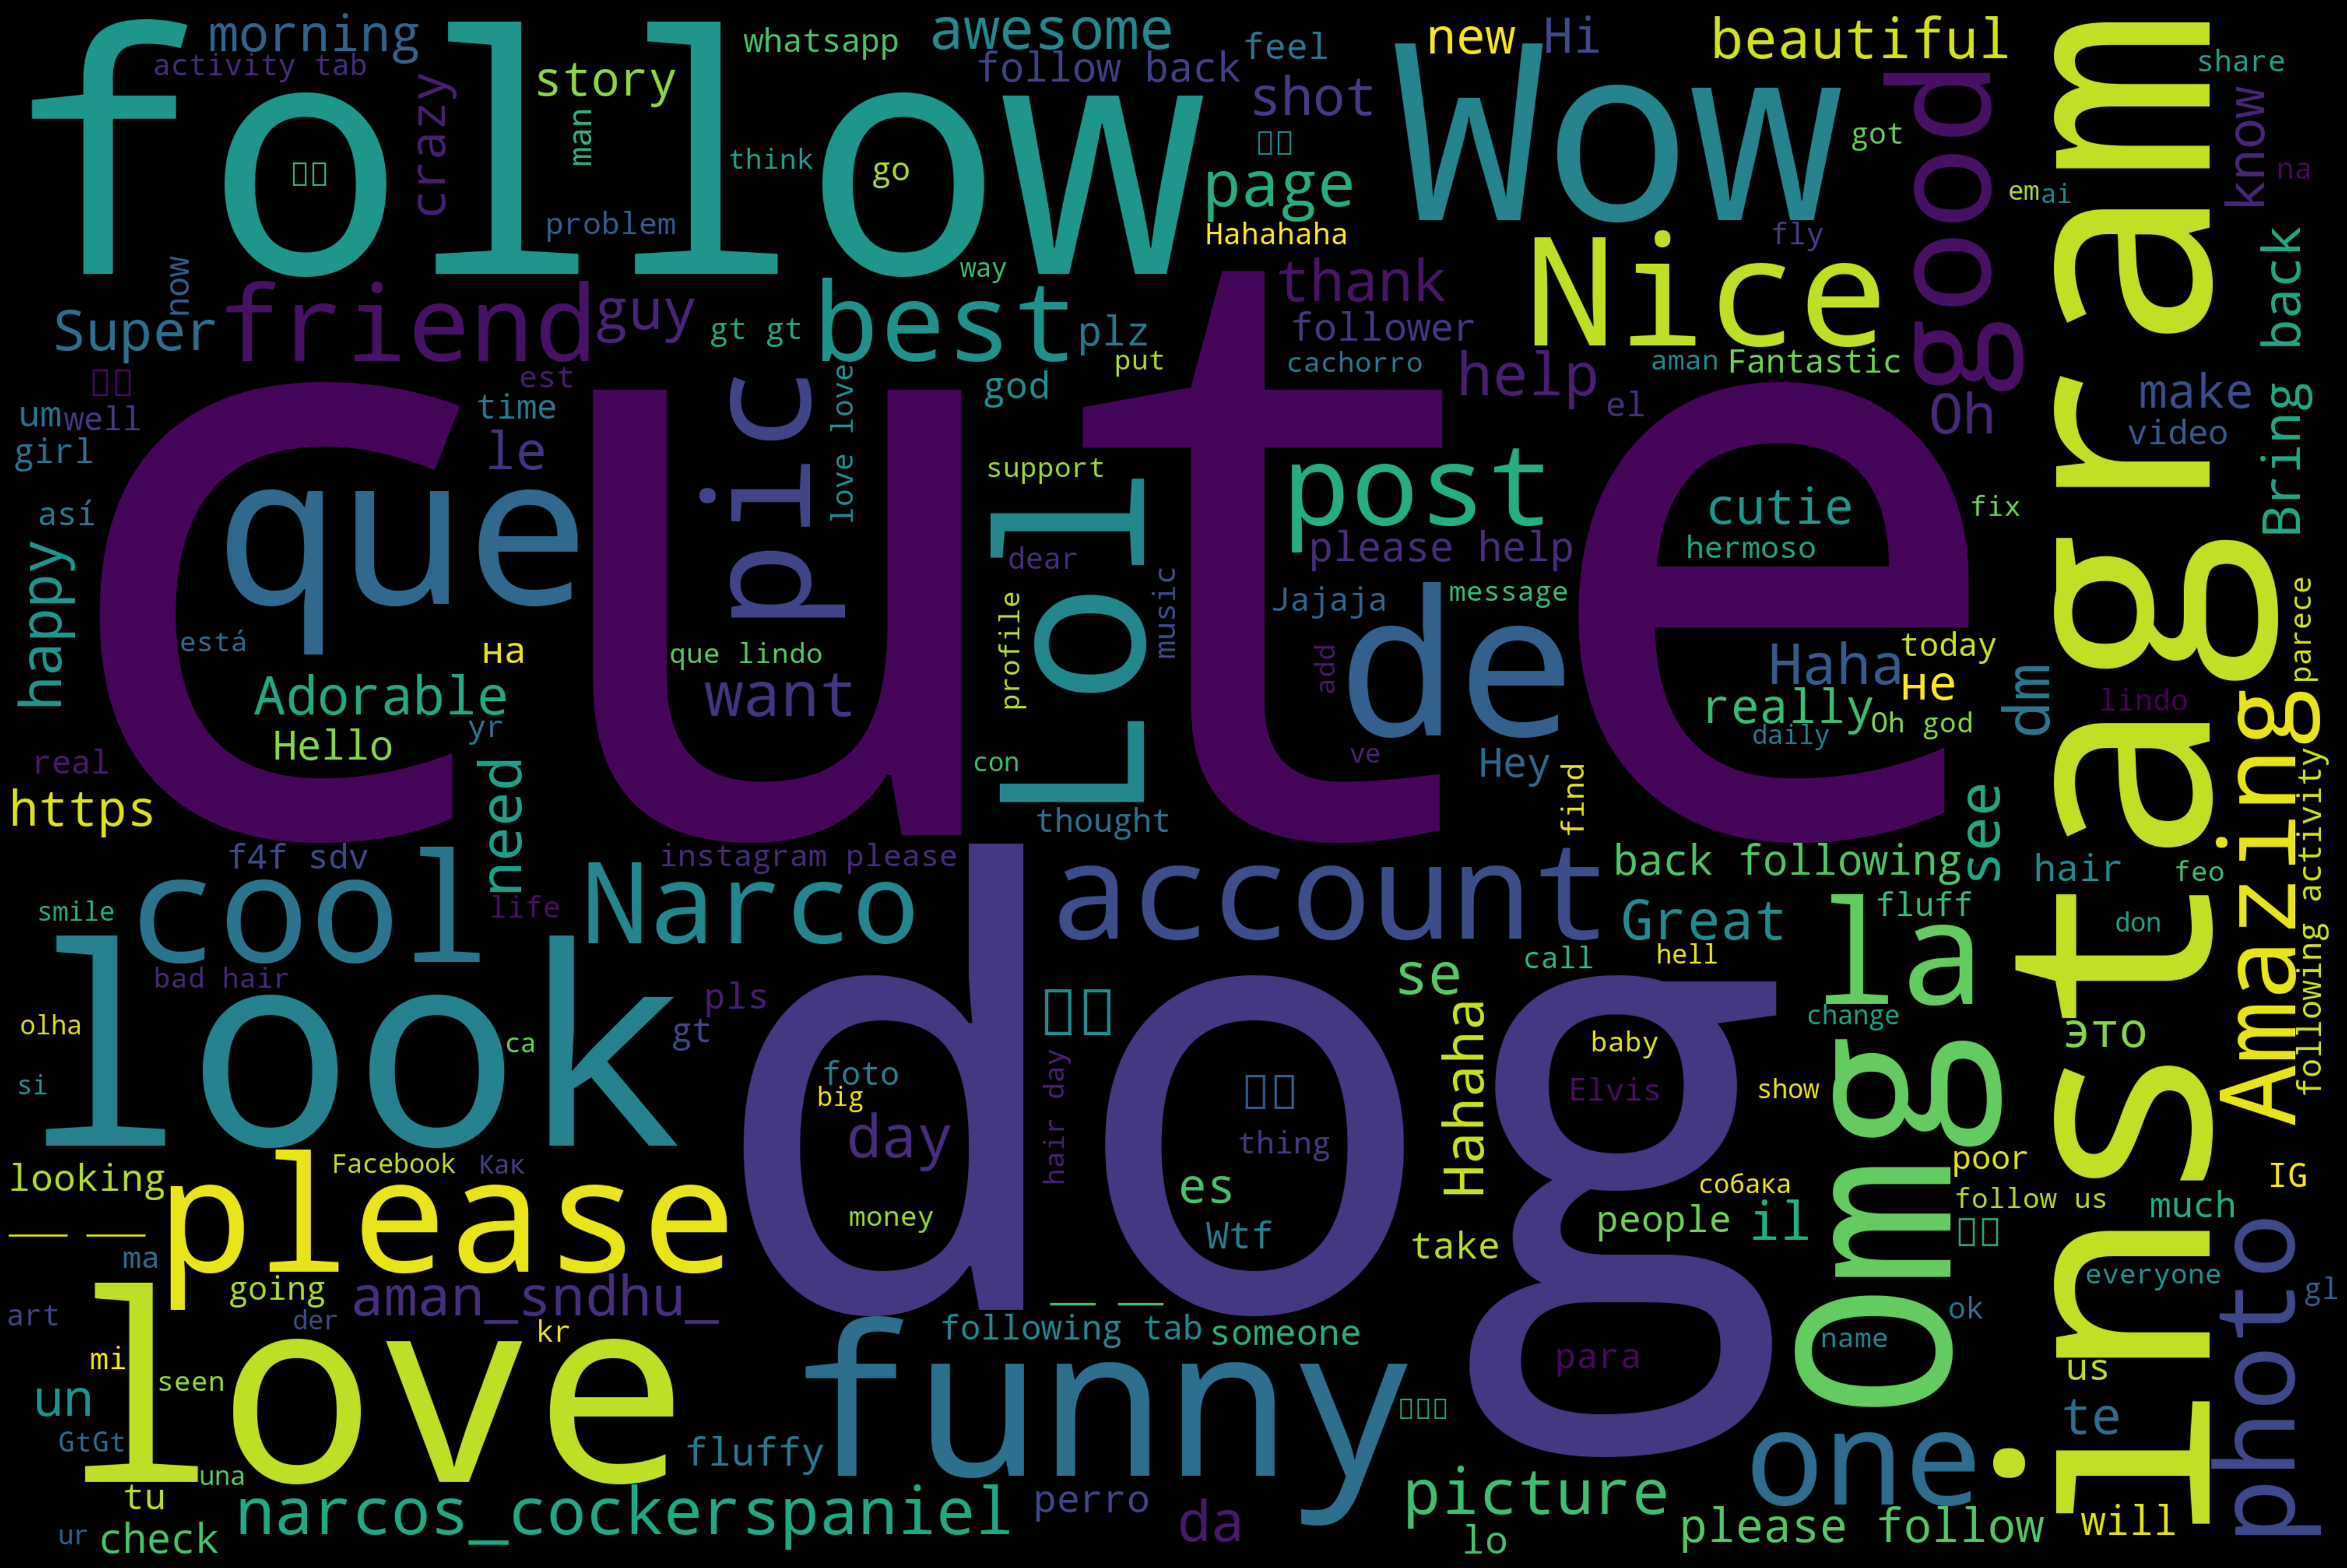

In [27]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [48]:
comments['posted_datetime'] = pd.to_datetime(
    comments['data.shortcode_media.edge_media_to_parent_comment.edges.node.created_at'],
    unit='s',
)
comments['posted_datetime_minute'] = comments['posted_datetime'].dt.round('min')
comments['posted_datetime_hour'] = comments['posted_datetime'].dt.round('H')
comments['posted_datetime_day'] = comments['posted_datetime'].dt.round('D')

comments['posted_datetime']

0       2019-10-22 17:14:35
1       2019-10-22 17:26:42
2       2019-10-22 17:31:40
3       2019-10-22 17:33:02
4       2019-10-22 17:33:16
                ...        
10931   2019-10-18 15:59:21
10932   2019-10-18 15:59:21
10933   2019-10-18 15:59:21
10934   2019-10-18 15:59:21
10935   2019-10-18 15:59:22
Name: posted_datetime, Length: 10936, dtype: datetime64[ns]

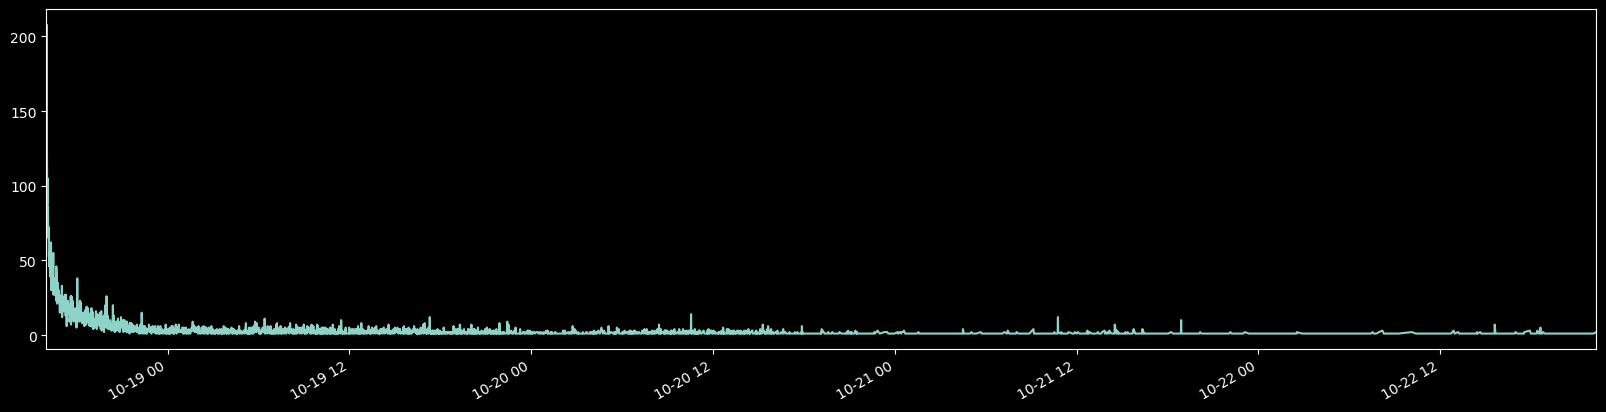

In [44]:
comments['posted_datetime_minute'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

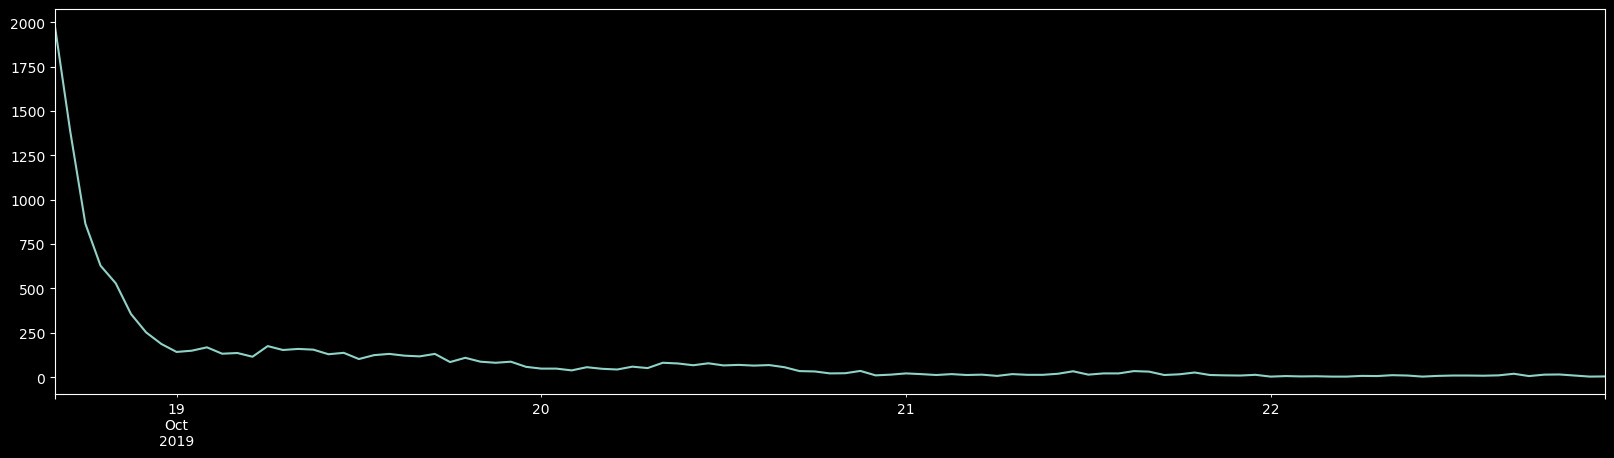

In [51]:
comments['posted_datetime_hour'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

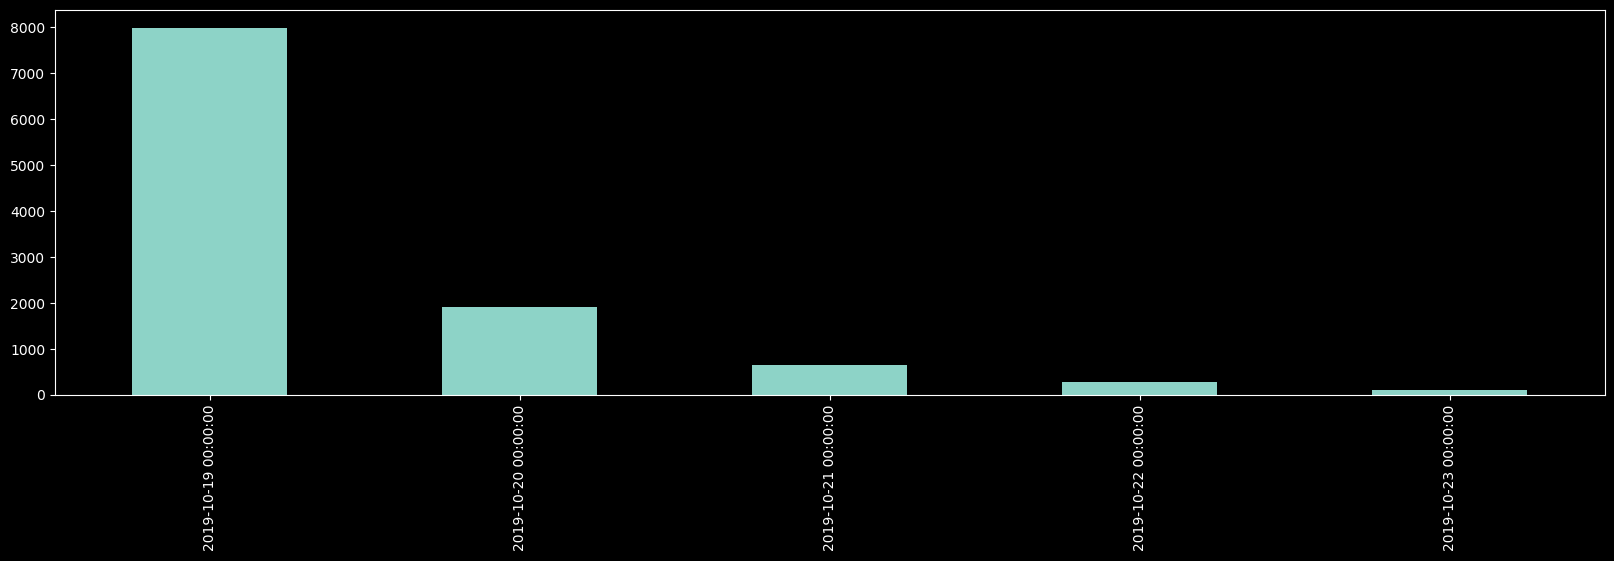

In [53]:
comments['posted_datetime_day'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

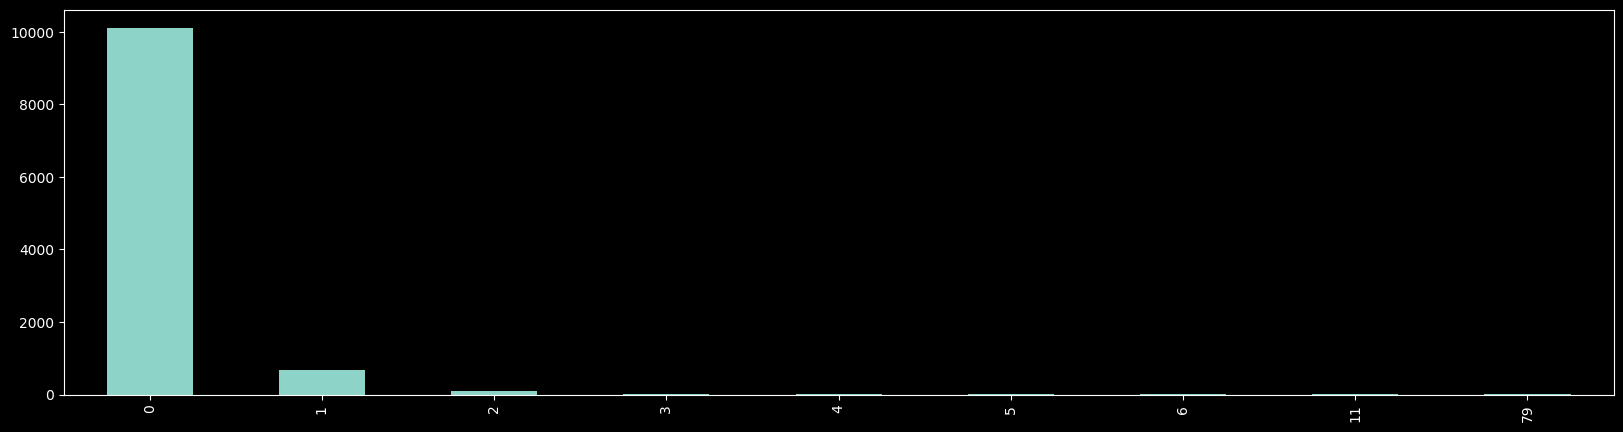

In [9]:
comments['data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_threaded_comments.count'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

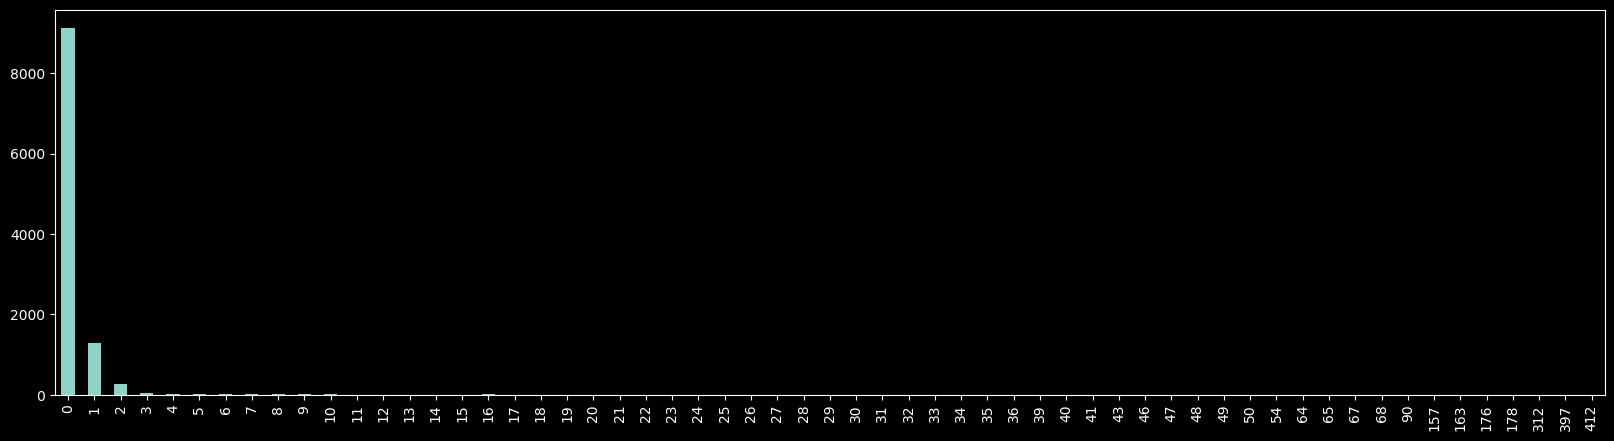

In [10]:
comments['data.shortcode_media.edge_media_to_parent_comment.edges.node.edge_liked_by.count'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

In [ ]:
comments['data.shortcode_media.edge_liked_by.edges.node.full_name'].str.count(email_regex)

email_users.shape[0]